In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
print(stroke.info())
display(stroke.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [122]:
print(stroke.isna().sum())
print(stroke.duplicated().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64
0


In [121]:
display(stroke.drop(columns = ['id','hypertension','heart_disease','stroke']).describe().transpose())

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000000,61.00,82.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885000,114.09,271.74
bmi,5110.0,28.870437,7.698843,10.30,23.800,28.313586,32.80,97.60


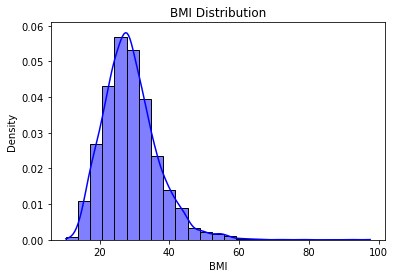

In [5]:
fig, ax = plt.subplots()
sns.histplot(data = stroke, x = 'bmi', color = 'blue',stat = 'density', kde = True, alpha = 0.5,bins = 25,ax = ax)
ax.set_title('BMI Distribution')
ax.set_xlabel('BMI')
plt.show()

We would like to focus on BMI and see its distribution because there are missing values to be filled. From the histogram above, we can see that BMI distribution is likely skewed to the right that is affected by the outliers. for the missing values in BMI, there are many many ways to handle missing values, such as :
1. Find out where the missing values are distributed. There are three conditions about the missing values : Missing Completely At Random, Missing At Random, or Missing Not At Random. After finding out the type of the missing value, we can proceed to fill it or delete it. for further information, please check : https://towardsdatascience.com/all-about-missing-data-handling-b94b8b5d2184, https://www.ncbi.nlm.nih.gov/books/NBK493614/ .

2. fill the missing values with common statistics that we know (mean, median, or modus), forwardfill, backwardfill, interpolation, etc.

3. Or we can just delete it the whole row if the missing values not really affect your analysis about the data

In [123]:
quantile = stroke['bmi'].quantile([0.25,0.5,0.75])
Q1 = quantile[0.25]
Q3 = quantile[0.75]
IQR = np.round(Q3 - Q1,1)
print(Q1)
print(Q3)
print(IQR)

23.8
32.8
9.0


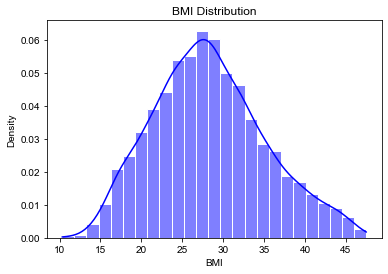

In [7]:
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR
minusoutlier = stroke[(stroke['bmi'] >= lower) & (stroke['bmi'] <= upper )]
#Plottuing BMI distribution minue the outliers
fig, ax = plt.subplots()
sns.set_style('darkgrid')
sns.histplot(data = minusoutlier, x = 'bmi', color = 'blue',stat = 'density', kde = True, alpha = 0.5, bins = 25,ax = ax)
ax.set_title('BMI Distribution')
ax.set_xlabel('BMI')
plt.show()

purpose : because we want to calculate a true representative mean from the majority of the data,we need to take out the outliers first from the data. Why? Because mean is sensitive to the outliers.

In [8]:
#Calculating BMI mean minus the outliers for filling the missing values
mean = minusoutlier['bmi'].mean()
stroke['bmi'] = stroke['bmi'].fillna(mean)
print(stroke.isna().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


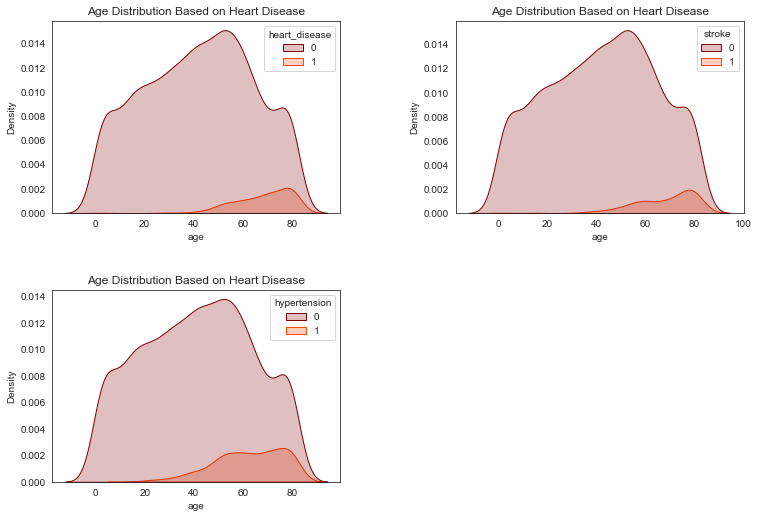

In [21]:
sns.set_style('white')
fig, ax = plt.subplots(2,2, figsize = (12,8))

sns.kdeplot(data = stroke, x = 'age', hue = 'heart_disease',palette = ["maroon","orangered"],fill = True,
             ax = ax[0,0])
ax[0,0].set_title('Age Distribution Based on Heart Disease')

sns.kdeplot(data = stroke, x = 'age', hue = 'stroke',palette = ["maroon","orangered"],fill = True,
             ax = ax[0,1])
ax[0,1].set_title('Age Distribution Based on Stroke')

sns.kdeplot(data = stroke, x = 'age', hue = 'hypertension',palette= ["maroon","orangered"],fill = True,
             ax = ax[1,0])
ax[1,0].set_title('Age Distribution Based on Hypertension')

ax[1,1].spines["bottom"].set_visible(False)
ax[1,1].spines["left"].set_visible(False)
ax[1,1].spines["top"].set_visible(False)
ax[1,1].spines["right"].set_visible(False)
ax[1,1].tick_params(left=False, bottom=False)
ax[1,1].set_xticklabels([])
ax[1,1].set_yticklabels([])

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()

From the graph above, we can see that most of people that have a heart disease, hypertension and stroke are old age.

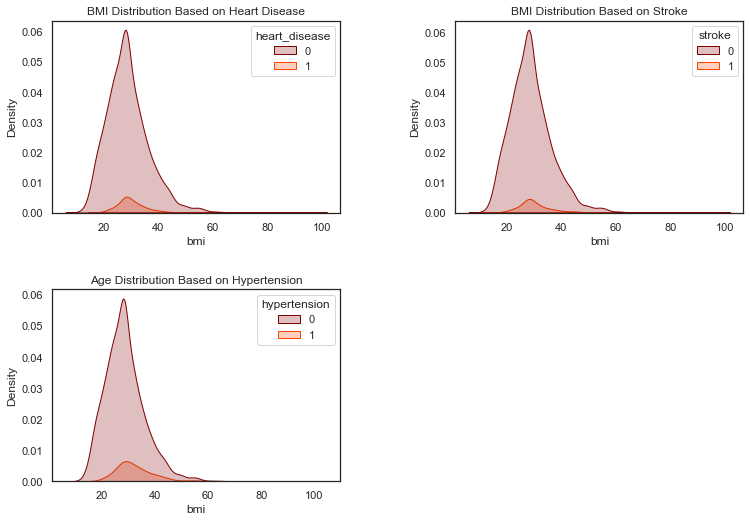

In [126]:
sns.set_style('white')
fig, ax = plt.subplots(2,2, figsize = (12,8))

sns.kdeplot(data = stroke, x = 'bmi', hue = 'heart_disease',palette = ["maroon","orangered"],fill = True,ax = ax[0,0])
ax[0,0].set_title('BMI Distribution Based on Heart Disease')

sns.kdeplot(data = stroke, x = 'bmi', hue = 'stroke',palette = ["maroon","orangered"],fill = True,ax = ax[0,1])
ax[0,1].set_title('BMI Distribution Based on Stroke')

sns.kdeplot(data = stroke, x = 'bmi', hue = 'hypertension',palette= ["maroon","orangered"],fill = True,
             ax = ax[1,0])
ax[1,0].set_title('Age Distribution Based on Hypertension')

ax[1,1].spines["bottom"].set_visible(False)
ax[1,1].spines["left"].set_visible(False)
ax[1,1].spines["top"].set_visible(False)
ax[1,1].spines["right"].set_visible(False)
ax[1,1].tick_params(left=False, bottom=False)
ax[1,1].set_xticklabels([])
ax[1,1].set_yticklabels([])

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()

From the graph above, it seems there is no correlation between BMI and having a heart disease, hypertension, and stroke. So, those 3 conditions do not depend on person's BMI.

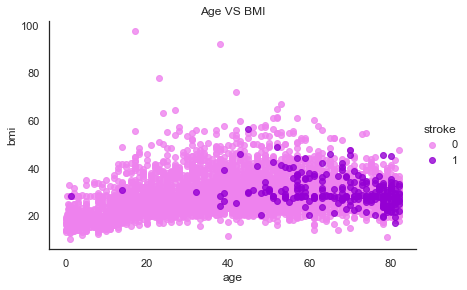

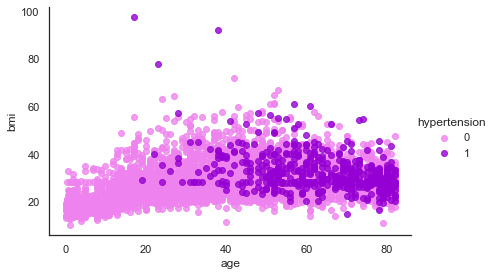

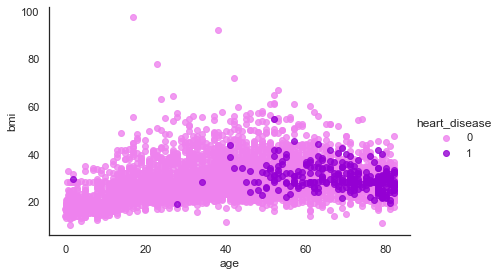

In [132]:
sns.lmplot(data = stroke, x = 'age',y ='bmi',hue = 'stroke', height = 4,aspect = 1.5, palette = ["violet","darkviolet"],
           fit_reg= False)
plt.title('Age VS BMI')

sns.lmplot(data = stroke, x = 'age',y ='bmi',hue = 'hypertension', height = 4,aspect = 1.5, palette = ["violet","darkviolet"],
           fit_reg= False)
sns.lmplot(data = stroke, x = 'age',y ='bmi',hue = 'heart_disease', height = 4,aspect = 1.5, palette = ["violet","darkviolet"],
           fit_reg= False)

plt.show()

All the statements that have been mentioned before, we can see it more cleary from the visualization above.

In [50]:
stroke_1 = stroke[stroke['stroke'] == 1]

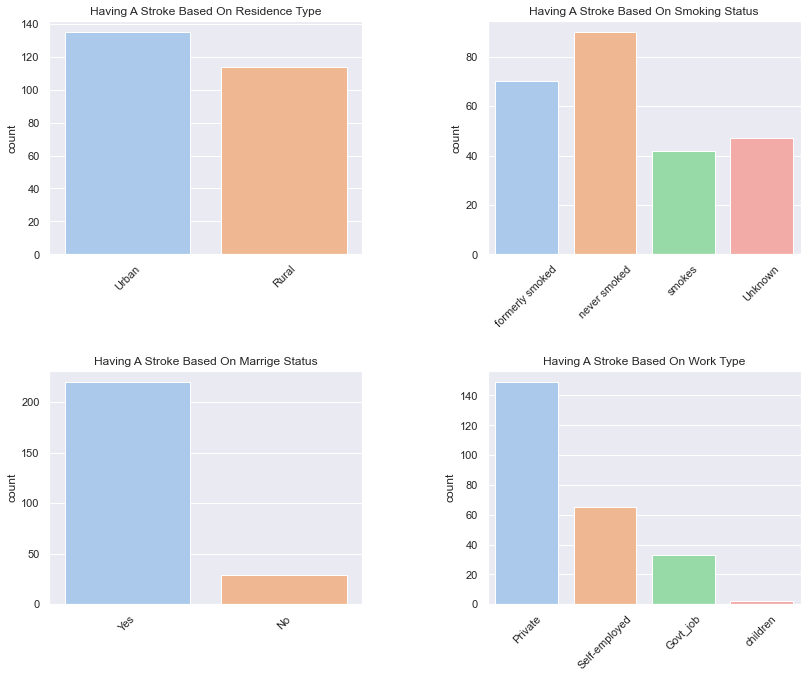

In [118]:
sns.set_theme(palette = 'pastel')
fig,ax = plt.subplots(2,2, figsize = (12,10))

sns.countplot(data = stroke_1, x = 'Residence_type',ax = ax[0,0], alpha = 1)
ax[0,0].set_title('Having A Stroke Based On Residence Type')
ax[0,0].tick_params(axis = 'x',rotation = 45)
ax[0,0].set_xlabel('')

sns.countplot(data = stroke_1, x = 'smoking_status',ax = ax[0,1], alpha = 1)
ax[0,1].set_title('Having A Stroke Based On Smoking Status')
ax[0,1].tick_params(axis = 'x',rotation = 45)
ax[0,1].set_xlabel('')

sns.countplot(data = stroke_1, x = 'ever_married',ax = ax[1,0], alpha = 1)
ax[1,0].set_title('Having A Stroke Based On Marrige Status')
ax[1,0].tick_params(axis = 'x',rotation = 45)
ax[1,0].set_xlabel('')

sns.countplot(data = stroke_1, x = 'work_type',ax = ax[1,1], alpha = 1)
ax[1,1].set_title('Having A Stroke Based On Work Type')
ax[1,1].tick_params(axis = 'x',rotation = 45)
ax[1,1].set_xlabel('')

plt.subplots_adjust(wspace=0.4, 
                    hspace=0.5)
plt.show()

From the graphs above, wa can see that a person who is married, working in private, living in urban area, and never smoked is likely to get a stroke than the other criteria.

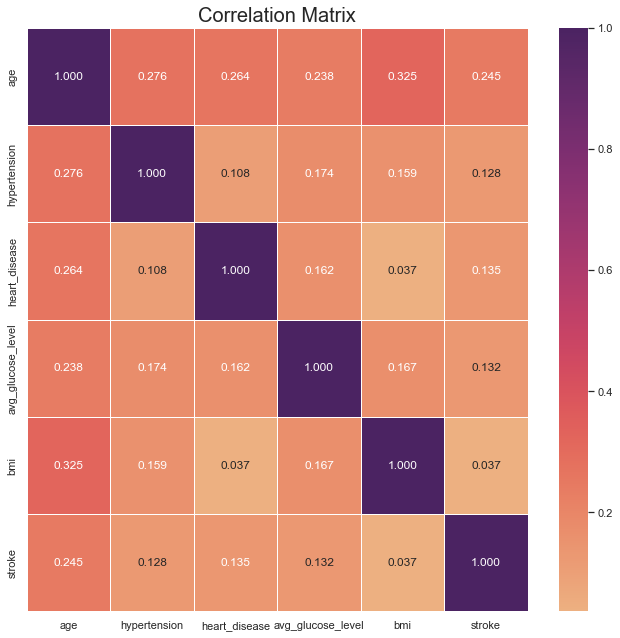

In [133]:
corr = stroke.drop('id',axis = 1).corr()
fig,ax = plt.subplots(figsize = (10,10))
sns.heatmap(corr, linewidths = 0.5,fmt = '.3f',cmap='flare',annot = True, ax = ax)
ax.set_title('Correlation Matrix', fontsize = 20)
plt.show()

From the graph above, we can see that there are no multicollinearity betweeen each variables, so we can proceed to buid a machine learning model without reducing some features.

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,roc_curve,roc_auc_score,precision_score,recall_score,f1_score

In [57]:
X = stroke.copy().drop(columns = ['id','stroke'])
y = stroke.copy()['stroke']
print(X.shape)
print(y.shape)

(5110, 10)
(5110,)


In [60]:
transformed = pd.get_dummies(X, columns = ['gender','ever_married','work_type','Residence_type','smoking_status'])
transformed['age'] = transformed['age'].astype('int64')
display(transformed.head())

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,0,1,228.69,36.600000,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
1,61,0,0,202.21,28.313586,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,80,0,1,105.92,32.500000,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,49,0,0,171.23,34.400000,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,79,1,0,174.12,24.000000,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0


In [61]:
SS = StandardScaler()
standardized_data = SS.fit_transform(transformed[['age','avg_glucose_level', 'bmi']])
transformed[['age','avg_glucose_level', 'bmi']] = standardized_data
display(transformed.head())

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.050950,0,1,2.706375,1.004089,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
1,0.785835,0,0,2.121559,-0.072336,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,1.625367,0,1,-0.005028,0.471489,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,0.255604,0,0,1.437358,0.718303,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,1.581181,1,0,1.501184,-0.632681,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0


In [62]:
X_train, X_test,y_train, y_test = train_test_split(transformed,y, test_size = 0.25, random_state = 32,stratify = y)

In [116]:
train_0_proportion = (len(y_train[y_train == 0])/len(y_train))*100
train_1_proportion = (len(y_train[y_train == 1])/len(y_train))*100
test_0_proportion = (len(y_test[y_test == 0])/len(y_test))*100
test_1_proportion = (len(y_test[y_test == 1])/len(y_test))*100
print('train data proportion : 0 ({:.1f} %) & 1 ({:.1f} %)'.format(train_0_proportion,train_1_proportion))
print('-'*25)
print('test data proportion : 0 ({:.1f} %) & 1 ({:.1f} %)'.format(test_0_proportion,test_1_proportion))

train data proportion : 0 (95.1 %) & 1 (4.9 %)
-------------------------
test data proportion : 0 (95.1 %) & 1 (4.9 %)


From the information about the class proportion above, we have an imbalaced data which is not good for building a good machine learning model because the model will predict majority class more succesfully than the minority class. One of the common metrics we use, that is classification accuracy which to see if the model is performing good or bad. however, when we are working with imbalanced data, the accuracy score will meet a failure interpretation. In order to avoid that, we can use another common metrics such as : Precision, Recall, F1 Score, ROC & AUC. For the further information you can check this : https://machinelearningmastery.com/failure-of-accuracy-for-imbalanced-class-distributions/

In [91]:
#Classification using Support Vector Machine
svc = SVC(kernel = 'rbf', C = 10, gamma = 5)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
acc_score = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1score = f1_score(y_test,y_pred)
report = classification_report(y_test,y_pred)
#print model assesments.
print(f'accuracy score : {acc_score}')
print('-'*25)
print('Classification report :')
print(f'Precision score : {precision}')
print(f'Recall (Sensitivity) score : {recall}')
print(f'F1 score : {f1score}')
print(report)

accuracy score : 0.935054773082942
-------------------------
Classification report :
Precision score : 0.043478260869565216
Recall (Sensitivity) score : 0.016129032258064516
F1 score : 0.023529411764705882
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1216
           1       0.04      0.02      0.02        62

    accuracy                           0.94      1278
   macro avg       0.50      0.50      0.49      1278
weighted avg       0.91      0.94      0.92      1278



In [99]:
data_0 = y_pred[y_pred == 0]
data_1 = y_pred[y_pred == 1]
proportion_0 = (len(data_0)/len(y_pred))*100
proportion_1 = (len(data_1)/len(y_pred))*100
print('Proportion data :')
print('Proportion of 0 = {:.1f} %'.format(proportion_0))
print('Proportion of 1 = {:.1f} %'.format(proportion_1))

Proportion data :
Proportion of 0 = 98.2 %
Proportion of 1 = 1.8 %


In [102]:
#GridSeacrh for SVM
C = [0.001,0.01,0.1,1,10,100]
gamma = [1,10,100]
params = {'C' : C, 'gamma' : gamma}
svc = SVC(kernel = 'rbf')
svc_cv = GridSearchCV(svc,params,cv = 5)
svc_cv.fit(X_train,y_train)
print(f'Best Parameter : {svc_cv.best_params_}')
print(f'Best Score : {svc_cv.best_score_}')

Best Parameter : {'C': 0.001, 'gamma': 1}
Best Score : 0.9512008060974738


In [103]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test)[:,1]

#Classification Evaluation.
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1score = f1_score(y_test,y_pred)
report = classification_report(y_test,y_pred)
AUC_score = roc_auc_score(y_test,y_pred_prob)
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

accuracy score : 0.935054773082942
-------------------------
Classification report :
Precision score : 0.0
Recall (Sensitivity) score : 0.0
F1 score : 0.0
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1216
           1       0.00      0.00      0.00        62

    accuracy                           0.95      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.91      0.95      0.93      1278

AUC score : 0.8235754456706281
-------------------------
ROC Curve :


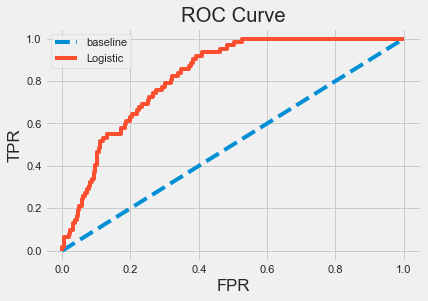

In [106]:
#print & plot
print(f'accuracy score : {acc_score}')
print("-"*25)
print('Classification report :')
print(f'Precision score : {precision}')
print(f'Recall (Sensitivity) score : {recall}')
print(f'F1 score : {f1score}')
print(report)
print(f'AUC score : {AUC_score}')
print('-'*25)
print('ROC Curve :')
plt.style.use('fivethirtyeight')
plt.plot([0,1],[0,1], label = 'baseline', linestyle = '--')
plt.plot(fpr,tpr, label = 'Logistic')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [112]:
#Classsification using LogisticRegression
RF = RandomForestClassifier(n_estimators = 200, max_depth = 20)
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)
y_pred_prob = RF.predict_proba(X_test)[:,1]

#Classification Evaluation.
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1score = f1_score(y_test,y_pred)
report = classification_report(y_test,y_pred)
AUC_score = roc_auc_score(y_test,y_pred_prob)
fpr1,tpr1,thresholds1 = roc_curve(y_test,y_pred_prob)

accuracy score : 0.935054773082942
-------------------------
Classification report :
Precision score : 0.0
Recall (Sensitivity) score : 0.0
F1 score : 0.0
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1216
           1       0.00      0.00      0.00        62

    accuracy                           0.95      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.91      0.95      0.93      1278

AUC score : 0.767641129032258
-------------------------
ROC Curve :


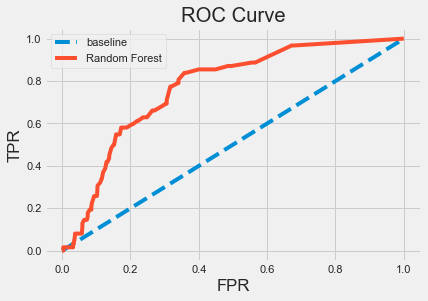

In [113]:
print(f'accuracy score : {acc_score}')
print("-"*25)
print('Classification report :')
print(f'Precision score : {precision}')
print(f'Recall (Sensitivity) score : {recall}')
print(f'F1 score : {f1score}')
print(report)
print(f'AUC score : {AUC_score}')
print('-'*25)
print('ROC Curve :')
plt.plot([0,1],[0,1], label = 'baseline', linestyle = '--')
plt.plot(fpr1,tpr1, label = 'Random Forest')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.show()

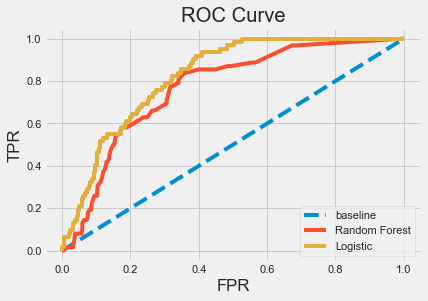

In [114]:
plt.plot([0,1],[0,1], label = 'baseline', linestyle = '--')
plt.plot(fpr1,tpr1, label = 'Random Forest')
plt.plot(fpr,tpr, label = 'Logistic')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.show()

The conclusion is all the models above are not good models. Why? Because we are working with inbalanced data, which a class '0' is more common (majority) than class '1' hence the model cannot predict well about class '1' by looking at the metrics that we have mentioned before. Even though the accuracy is ranged between (90-95 %) for all the models, it is not a true value and it leads to a false interpretation as we have mentioned before about accuracy in imbalanced data.